# Introduction to Motion Energy Models

## Overview

Welcome to the first day of our journey into the world of motion energy models! This notebook introduces the fundamental concepts and importance of motion energy models in the context of visual neuroscience.

### What we'll cover:
- What are motion energy models and why do we study them?
- How motion is represented in the brain and in computational models
- Historical context and key developments
- The biological basis in visual cortex
- A roadmap of what we'll build throughout this course

## Setting Up

Let's first import the libraries we'll need throughout the course.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# For interactive plots
%matplotlib inline
from IPython.display import HTML, display

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. The Challenge of Motion Perception

Think about what happens when you watch a bird flying across the sky, a car driving down the street, or even just waving your hand in front of your face. Your visual system effortlessly detects and tracks these moving objects. But how does your brain do this?

### The Problem

At its core, your retina is just a two-dimensional array of photoreceptors, each reporting the light intensity at a particular location. Your retina doesn't directly "see" motion - it just receives a sequence of static images over time. Yet somehow, your brain transforms this sequence into a robust perception of motion.

This is a fundamental computational problem that any visual system must solve:

**How do we extract motion information from a sequence of static images?**

This challenge is at the heart of both biological vision systems and computer vision algorithms. Motion perception requires the visual system to correlate information across both space and time to infer the direction and speed of moving objects.

Let's visualize this problem with a simple animation of a moving dot:

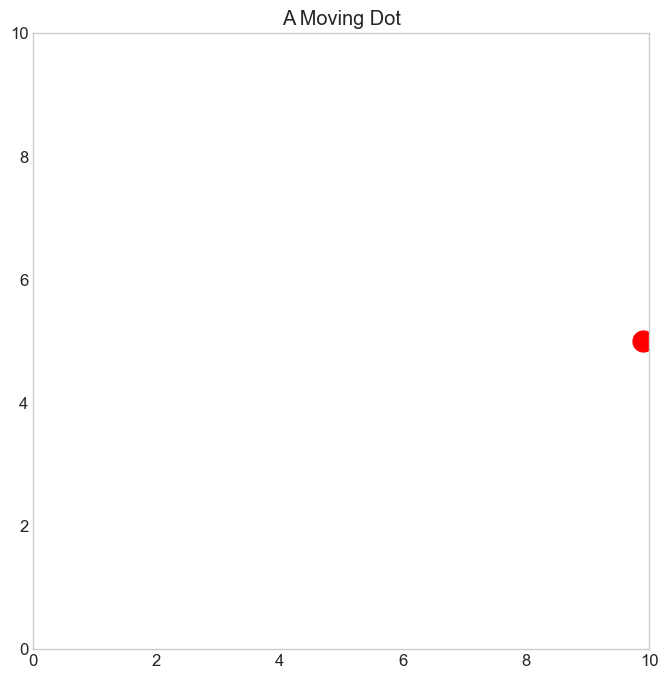

In [13]:
# Create a simple animation of a moving dot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.set_title('A Moving Dot')
ax.grid(False)

dot, = ax.plot([], [], 'ro', markersize=15)

def init():
    dot.set_data([], [])
    return (dot,)

def animate(i):
    x = i / 10.0
    y = 5
    dot.set_data([x], [y])
    return (dot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)

HTML(anim.to_jshtml())

## 2. What are Motion Energy Models?

Motion energy models offer a computational framework that explains how the brain might solve this problem. They were developed to describe how neurons in the visual cortex could extract motion information from the visual input.

### Intuition

Imagine you're watching a flipbook animation: each page shows a slightly different drawing of a ball, and when you flip through the pages quickly, it looks like the ball is moving. A Motion Energy Model is kind of like a brainy version of that flipbook. It's a way for computers — or even your brain — to detect motion by comparing a series of images (like frames in a video) and seeing how things change over time.

1. Eyes like filters: Imagine you have a special pair of glasses that only lets you see vertical lines or horizontal lines. These are like the filters used in the model. They help pick out certain features in an image — for example, edges or stripes pointing in certain directions.
2. Watching a video with your glasses: Now you're watching a video through these glasses. If an object moves to the right, you'll see the pattern of light and dark stripes shift frame by frame.
3. Sensitive to timing: Your brain (or the model) compares how those patterns change over space and time — for example, "this stripe moved to the right in the next frame." The model looks for specific combinations of motion (like rightward or upward motion at a certain speed and direction).
4. Energy means strength of motion: If the motion in the video matches what the filter is looking for, the model gives a high energy response. That just means “Yes! I see motion in this direction!” If it doesn’t match, the energy is low.
5. Putting it all together: By using lots of different filters (each tuned to different directions and speeds), the model can figure out: Is something moving? In which direction? How fast?

### Key Insight

The core insight of motion energy models is that motion can be detected by using **spatiotemporal filters** that are selective for both the spatial pattern of the stimulus and how it changes over time.

In simpler terms, these models suggest that your brain has specialized neural circuits that act like motion detectors, each tuned to respond preferentially to motion in a particular direction and at a particular speed.

### Historical Context

Motion energy models were introduced in the mid-1980s by Edward Adelson and James Bergen, as well as by Andrew Watson and Albert Ahumada (in a parallel development). These models were groundbreaking because they provided a biologically plausible mechanism for motion detection that explained many phenomena in human motion perception.

The models built upon earlier work on motion detection, including the influential Reichardt detector, but incorporated principles of linear systems theory and signal processing that made them more powerful and mathematically tractable.

### Key Components

Motion energy models consist of several key components:

1. **Spatiotemporal filtering**: The visual input is processed through filters that are oriented in space-time, making them selective for motion in specific directions

2. **Quadrature pairs**: Pairs of filters that are 90° out of phase with each other

3. **Energy computation**: Squaring and summing the outputs of these filters to get a phase-invariant measure of motion

4. **Opponent processing**: Comparing energy in opposite directions to determine the net motion direction

Throughout this course, we'll build an intuitive understanding of each of these components and how they work together to detect motion.

## 3. Motion in Space-Time: A New Way of Thinking

To understand motion energy models, we need to think about motion in a different way. Instead of thinking about objects changing position over time, we can think about motion as patterns in a three-dimensional space where the dimensions are x, y, and t (time).

This 3D representation is called **spatiotemporal space**.

### The Geometry of Motion

In spatiotemporal space, different types of motion create distinct geometric patterns:

- A stationary object appears as a straight line parallel to the time axis
- An object moving at constant velocity creates a slanted plane (or line in 2D space-time)
- Accelerating objects create curved surfaces
- Different directions of motion correspond to planes with different orientations

This geometric perspective allows us to think of motion detection as identifying oriented patterns in this 3D space. Motion energy models work by designing filters specifically tuned to detect these oriented patterns.

Let's visualize this with a simple example. Imagine a vertical bar moving from left to right across a 1D space (a single row of pixels). We'll represent this motion in two ways:

1. **Left graph**: Shows individual frames at different time points - what the retina actually receives. Each colored line represents the intensity pattern at a different moment in time, with the bar moving rightward in successive frames.

2. **Right graph**: Shows the complete space-time representation - where space is on the horizontal axis and time flows downward on the vertical axis. The motion of the bar creates a distinctive diagonal pattern through space-time.

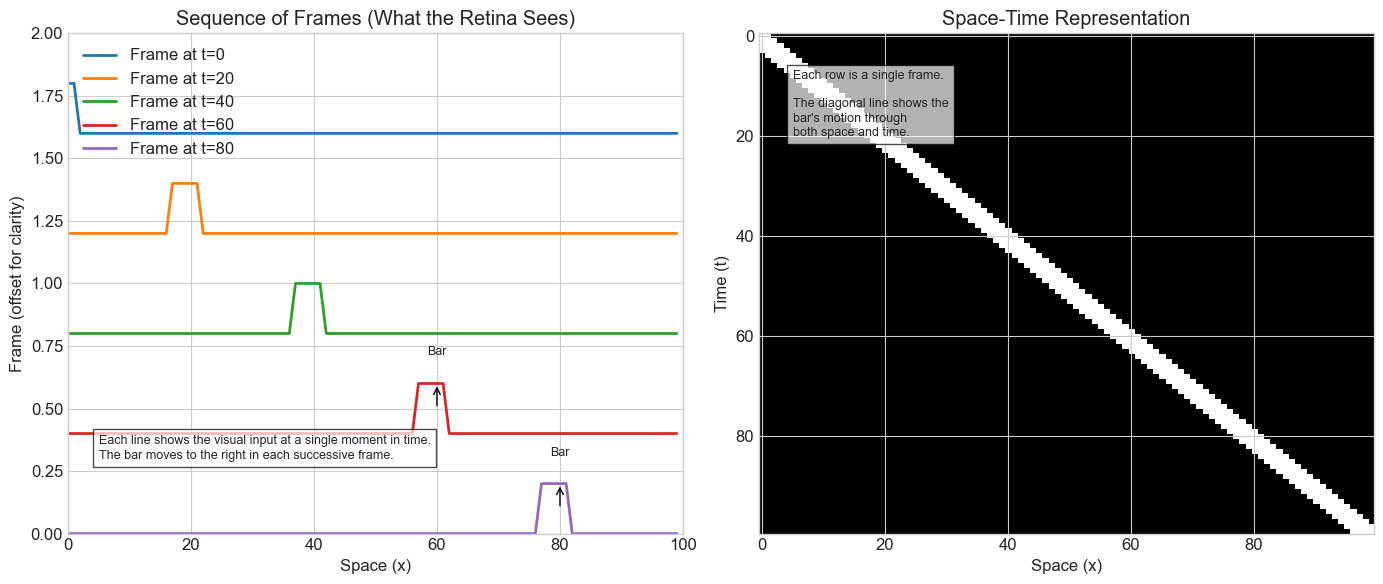

In [14]:
# Create a space-time plot of a moving bar
width = 100
frames = 100
bar_width = 5
speed = 1

# Create an empty space-time array
spacetime = np.zeros((frames, width))

# Add a moving bar
for t in range(frames):
    pos = (t * speed) % width
    bar_start = int(max(0, pos - bar_width/2))
    bar_end = int(min(width, pos + bar_width/2))
    spacetime[t, bar_start:bar_end] = 1

# Plot the space-time diagram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Show the first few frames as separate images
ax1.set_title('Sequence of Frames (What the Retina Sees)')
offset_values = [1.6, 1.2, 0.8, 0.4, 0]  # Fixed offsets, decreasing from top to bottom

for i in range(5):
    frame_num = i*20
    # Plot each frame with a fixed offset for clarity (not increasing with space)
    ax1.plot(range(width), offset_values[i] + spacetime[frame_num, :] * 0.2, 
             label=f'Frame at t={frame_num}', linewidth=2)
    
    # Add a text label showing the position of the bar
    bar_pos = (frame_num * speed) % width
    if bar_pos > width/2:  # Only add arrow for bars that aren't at the edge
        ax1.text(bar_pos, offset_values[i] + 0.3, "Bar", 
                ha='center', va='bottom', fontsize=9)
        ax1.annotate("", xy=(bar_pos, offset_values[i] + 0.2), 
                    xytext=(bar_pos, offset_values[i] + 0.1),
                    arrowprops=dict(arrowstyle="->", lw=1))
    
ax1.set_ylim(0, 2)
ax1.set_xlim(0, width)
ax1.set_xlabel('Space (x)')
ax1.set_ylabel('Frame (offset for clarity)')
ax1.legend(loc='upper left')  # Position legend at upper left to avoid overlap

# Add explanation text in a better position
ax1.text(5, 0.3, "Each line shows the visual input at a single moment in time.\nThe bar moves to the right in each successive frame.", 
         fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

# Show the space-time representation
ax2.set_title('Space-Time Representation')
im = ax2.imshow(spacetime, cmap='gray', aspect='auto', origin='upper')
ax2.set_xlabel('Space (x)')
ax2.set_ylabel('Time (t)')
ax2.text(5, 20, "Each row is a single frame.\n\nThe diagonal line shows the\nbar's motion through\nboth space and time.", 
         fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()

## 4. Key Concepts in Motion Energy Models

Look carefully at the space-time plot on the right in the figure above. Notice how the moving bar creates a diagonal line in space-time. **This diagonal orientation is the key to understanding motion energy models.** If we can build filters that detect this specific diagonal pattern in space-time, we can detect rightward motion.

Different motion directions and speeds create different space-time orientations:
- A rightward moving object (like our bar) creates a diagonal with negative slope
- A leftward moving object would create a diagonal with positive slope
- Faster motion creates a steeper slope
- Slower motion creates a shallower slope

Motion energy models capitalize on this insight by using specialized filters that respond selectively to these specific space-time orientations. Rather than tracking objects from frame to frame, these models directly detect the space-time patterns created by motion.

Let's now explore the key components that make this possible:

### 1. Spatiotemporal Filtering

The first step in motion energy computation is to filter the visual input through spatiotemporal filters. These filters are selective for specific patterns in space and time, such as leftward or rightward motion. They are essentially detectors that respond to particular space-time orientations, which correspond to motion in specific directions and speeds.

### 2. Quadrature Pairs

Motion energy models use pairs of filters that are 90° out of phase with each other (quadrature pairs). This allows the model to respond to motion regardless of the exact spatial phase of the stimulus. Think of these as complementary detectors that together capture all possible phases of a moving pattern.

### 3. Energy Computation

The outputs of these quadrature pairs are squared and summed to compute a measure of motion energy. This energy is phase-invariant, meaning it responds to motion regardless of the exact appearance of the moving pattern. The squaring operation converts the positive and negative filter responses into purely positive values, while the summing combines the complementary information from the quadrature pair.

### 4. Direction Selectivity

By comparing the energy in opposite directions (e.g., leftward vs. rightward), the model can determine the net direction of motion in the stimulus. This opponent processing enhances the directional selectivity of the system and mirrors neurobiological mechanisms in the visual cortex.

Throughout the course, we'll build each of these components and see how they work together to detect and analyze motion.

## 5. Course Roadmap: What's Ahead

Here's what we'll be covering in the coming weeks:

### Module 1: Foundations (You are here)
- Building mathematical intuition for motion representation
- Understanding filtering and signal processing fundamentals
- Exploring visual stimuli and how they appear in space-time

### Module 2: Visual Neuroscience
- Exploring how biological vision systems detect motion
- Learning about simple and complex cells in the visual cortex
- Mapping computational elements to neural structures

### Module 3: Core Motion Energy Model
- Implementing the complete Adelson & Bergen model
- Building spatiotemporal filters and quadrature pairs
- Creating direction-selective mechanisms

### Module 4: Extensions and Applications
- Implementing opponent motion processing
- Comparing with other motion detection approaches
- Applying models to real-world problems

By the end of the course, you'll have a deep understanding of motion energy models, both in theory and in practice, and you'll be able to apply these models to analyze and understand motion perception.

## Summary

In this introduction, we've covered:

- The fundamental challenge of motion perception: extracting motion from a sequence of static images
- The key insight of motion energy models: using spatiotemporal filters to detect motion
- The spatiotemporal representation of motion: visualizing motion as oriented patterns in space-time
- An overview of the key components of motion energy models
- A roadmap of what we'll be learning throughout the course

In the next section, we'll dive deeper into visual stimuli used to study motion perception, which will allow us to create and manipulate motion patterns that we can analyze with our models.

## Additional Resources

If you're interested in learning more about motion energy models, here are some resources to check out:

### Key Papers
- Adelson, E. H., & Bergen, J. R. (1985). Spatiotemporal energy models for the perception of motion. *Journal of the Optical Society of America A*, 2(2), 284-299.
  - This seminal paper introduced the motion energy model and is essential reading
- Watson, A. B., & Ahumada, A. J. (1985). Model of human visual-motion sensing. *Journal of the Optical Society of America A*, 2(2), 322-342.
  - A complementary model published at the same time as Adelson & Bergen
- Simoncelli, E. P., & Heeger, D. J. (1998). A model of neuronal responses in visual area MT. *Vision Research*, 38(5), 743-761.
  - Extends motion energy concepts to higher visual areas

### Books
- Wandell, B. A. (1995). *Foundations of Vision*. Sinauer Associates.
  - Excellent overview of visual processing with accessible explanations
- Dayan, P., & Abbott, L. F. (2001). *Theoretical Neuroscience: Computational and Mathematical Modeling of Neural Systems*. MIT Press.
  - Contains a thorough treatment of motion energy models in a broader theoretical context

See the full list of resources in the [references section](../../../references/additional_resources.md).